**Vinay Nagaraj - Week 5 & 6 Assignment**

***Activity 7: Reading Tabular Data from a Web Page and Creating DataFrames***

In [27]:
# Load necessary libraries
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import sqlite3

In [28]:
# Read the webpage page using bs4 (BeautifulSoup)
# Save the url and use the url in our get request call. The inspect data would be saved off in GDP field which with the help of Beautifulsoup is stored in soup.

url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
GDP = requests.get(url).text
soup = BeautifulSoup(GDP)

In [29]:
# Find the table structure you will need to deal with(how many tables there are?)
# Using the above populated soup field, we will use find_all to find the number of tables in the webpage.

all_tabs = soup.find_all("table")
print('Total number of <table> is : ', len(all_tabs))

Total number of <table> is :  14


In [30]:
# Select Right table using bs4
# The data/tables we are interested is under the class wikitable. 

tab_GDP = soup.find("table", attrs={"class": "wikitable"})  #store table with class = wikitable

# Table titles

tab_GDP_data = tab_GDP.tbody.find_all("tr")                 # Select all 'tr' in tbody tag

heads = []
for td in tab_GDP_data[0].find_all("td"):                   # Select all 'td' in 1st 'tr' to get the titles 
    heads.append(td.b.text.replace('\n', ' ').strip())      # Add titles texts into the list
    
heads

['Per the International Monetary Fund (2019 estimates)',
 'Per the World Bank (2019)',
 'Per the United Nations (2018)']

In [31]:
# Get the table's sub headers

tab_GDP_sub = tab_GDP_data[1].find_all("table")             # Store sub tables
print('Total number of sub tabels is : ', len(tab_GDP_sub)) # We have total 3 sub tables

sub_heads = []
for th in tab_GDP_sub[0].find_all("th"):                    # Select all 'th' in 1st 'table' to get titles
    sub_heads.append(th.text.replace('\n', ' ').strip())    # All sub titles texts into the list
    
sub_heads

Total number of sub tabels is :  3


['Rank', 'Country/Territory', 'GDP(US$million)']

In [32]:
# Separate the source names and their corresponding data

sources = []
for td in tab_GDP_data[0].find_all("td"):                   # Select all 'td' in 1st 'tr' to get the titles 
    a = td.find('a', href=True)
    sources.append('https://en.wikipedia.org'+a['href'])   # Add source into the list

sources

['https://en.wikipedia.org/wiki/International_Monetary_Fund',
 'https://en.wikipedia.org/wiki/World_Bank',
 'https://en.wikipedia.org/wiki/United_Nations']

In [33]:
# Get the table data

Data = {}

for table, head in zip(tab_GDP_sub, heads):
    
    # Get all the rows of table
    tab_data = []
    
    # find all 'tr's in table tbody
    for tr in table.tbody.find_all("tr"):
        tab_row = {}
        
        # find all 'td's in 'tr' and zip it with sub_heads
        for td, th in zip(tr.find_all("td"), sub_heads):
            tab_row[th] = td.text.replace('\n', '').strip()
        
        # Add each row into the table
        tab_data.append(tab_row)
        
    Data[head] = tab_data

#print(Data)

Data

{'Per the International Monetary Fund (2019 estimates)': [{},
  {'Rank': '',
   'Country/Territory': 'World[19]',
   'GDP(US$million)': '87,265,226'},
  {'Rank': '1',
   'Country/Territory': 'United States',
   'GDP(US$million)': '21,439,453'},
  {'Rank': '—',
   'Country/Territory': 'European Union[22][n 1]',
   'GDP(US$million)': '18,705,132'},
  {'Rank': '2',
   'Country/Territory': 'China[n 2]',
   'GDP(US$million)': '14,140,163'},
  {'Rank': '3', 'Country/Territory': 'Japan', 'GDP(US$million)': '5,154,475'},
  {'Rank': '4',
   'Country/Territory': 'Germany',
   'GDP(US$million)': '3,863,344'},
  {'Rank': '5', 'Country/Territory': 'India', 'GDP(US$million)': '2,935,570'},
  {'Rank': '6',
   'Country/Territory': 'United Kingdom',
   'GDP(US$million)': '2,743,586'},
  {'Rank': '7', 'Country/Territory': 'France', 'GDP(US$million)': '2,707,074'},
  {'Rank': '8', 'Country/Territory': 'Italy', 'GDP(US$million)': '1,988,636'},
  {'Rank': '9', 'Country/Territory': 'Brazil', 'GDP(US$million

***Activity 8: Handling Outliers and Missing Data***

In [34]:
# Read visit_data CSV file
visit_df = pd.read_csv('visit_data.csv')

# Dataframe Details
visit_df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [35]:
shp1 = visit_df.shape
print('Number of rows in the dataframe is : ', shp1[0])

Number of rows in the dataframe is :  1000


In [36]:
# Check for any duplicate entries in the email column
print('Duplicate entries in email column is : ', visit_df.duplicated(['email']).sum())

Duplicate entries in email column is :  0


From above, we can see that are no duplicate entries in the email column

In [37]:
# Check for missing values (NaN)
visit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          1000 non-null   int64  
 1   first_name  704 non-null    object 
 2   last_name   704 non-null    object 
 3   email       1000 non-null   object 
 4   gender      495 non-null    object 
 5   ip_address  1000 non-null   object 
 6   visit       974 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


In [38]:
# Dropna from visit column
visit_df1 = visit_df.dropna(subset=['visit'], axis=0)
shp2 = visit_df1.shape
print('Number of rows in new dataframe is : ', shp2[0])

Number of rows in new dataframe is :  974


{'whiskers': [<matplotlib.lines.Line2D at 0x121788610>,
 'caps': [<matplotlib.lines.Line2D at 0x12178fd10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1217885d0>],
 'medians': [<matplotlib.lines.Line2D at 0x11f241790>],
 'fliers': [<matplotlib.lines.Line2D at 0x11f241c90>],
 'means': []}

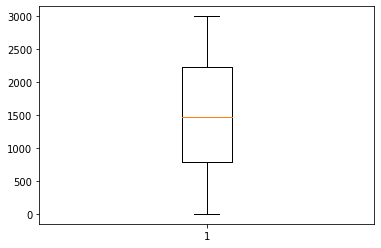

In [39]:
# Plot Box plot
plt.boxplot(visit_df1.visit)   # Box plot

We can see that values in visit column ranges from 0 to 3000, and majority of the values are between 800 to 2300. The values below 100 or above 2900 can b considered as outliers.

In [40]:
# Remove Outliers
visit_df2 = visit_df1[(visit_df1['visit'] <= 2900) & (visit_df1['visit'] >= 100)]
shp3 = visit_df2.shape
print('Number of rows in new dataframe is : ', shp3[0])

Number of rows in new dataframe is :  923


***3. Insert data into a SQL Lite database***

In [48]:
# Insert data into a SQL Lite database, Create a table

query = """
CREATE TABLE personal_info
(Name VARCHAR(20), 
 Address VARCHAR(35), 
 City VARCHAR(10), 
 State VARCHAR(2), 
 Zip NUM(5), 
 Phone Number NUM(10)
 );"""

con = sqlite3.connect('mydata.sqlite') # Connect to server
#con.execute(query)                     # Commented as table is already created
con.commit()                           # Commit changes

In [49]:
# Insert 10 rows into database

data = [('Vinay Nagaraj', '6855 Pacific St', 'Omaha', 'NE', 68106, 1234567891),
        ('Anubrata Sahoo', '809 S 70th Plz', 'Omaha', 'NE', 68106, 2345678912),
        ('Sasirekaa K', '705 N 82nd plz', 'Ralston', 'NE', 68127, 3456789123),
        ('Sweta Ranjan', '7510 Lakeview Ct', 'La Vista', 'NE', 68961, 4567891234),
        ('Greg Martin', '1122 Dodge St', 'Omaha', 'NE', 68106, 5678912345),
        ('Soledad Wells', '1855 W Center St', 'Omaha', 'NE', 68116, 9670912345),
        ('Le Swamy', '58 Harrison St', 'Omaha', 'NE', 69116, 6678910345),
        ('Meera Santosh', '7998 Pacific St', 'Omaha', 'NE', 68106, 5670002345),
        ('Dan Cross', '849 Crosswinds apt', 'Omaha', 'NE', 68160, 8678912005),
        ('Steve Austin', '6855 Pacific St', 'Omaha', 'NE', 68106, 7600012345)]

stmt = "INSERT INTO personal_info VALUES(?, ?, ?, ?, ?, ?)"

con.executemany(stmt, data)
con.commit()

In [50]:
# Display the content of database
cursor = con.execute('select * from personal_info')
rows = cursor.fetchall()
rows

[('Vinay Nagaraj', '6855 Pacific St', 'Omaha', 'NE', 68106, 1234567891),
 ('Anubrata Sahoo', '809 S 70th Plz', 'Omaha', 'NE', 68106, 2345678912),
 ('Sasirekaa K', '705 N 82nd plz', 'Ralston', 'NE', 68127, 3456789123),
 ('Sweta Ranjan', '7510 Lakeview Ct', 'La Vista', 'NE', 68961, 4567891234),
 ('Greg Martin', '1122 Dodge St', 'Omaha', 'NE', 68106, 5678912345),
 ('Soledad Wells', '1855 W Center St', 'Omaha', 'NE', 68116, 9670912345),
 ('Le Swamy', '58 Harrison St', 'Omaha', 'NE', 69116, 6678910345),
 ('Meera Santosh', '7998 Pacific St', 'Omaha', 'NE', 68106, 5670002345),
 ('Dan Cross', '849 Crosswinds apt', 'Omaha', 'NE', 68160, 8678912005),
 ('Steve Austin', '6855 Pacific St', 'Omaha', 'NE', 68106, 7600012345)]

In [51]:
# Write data from database into a pandas dataframe

DF_Tab = pd.DataFrame(rows, columns=[x[0] for x in cursor.description])
DF_Tab

,Name,Address,City,State,Zip,Phone
0,Vinay Nagaraj,6855 Pacific St,Omaha,NE,68106,1234567891
1,Anubrata Sahoo,809 S 70th Plz,Omaha,NE,68106,2345678912
2,Sasirekaa K,705 N 82nd plz,Ralston,NE,68127,3456789123
3,Sweta Ranjan,7510 Lakeview Ct,La Vista,NE,68961,4567891234
4,Greg Martin,1122 Dodge St,Omaha,NE,68106,5678912345
5,Soledad Wells,1855 W Center St,Omaha,NE,68116,9670912345
6,Le Swamy,58 Harrison St,Omaha,NE,69116,6678910345
7,Meera Santosh,7998 Pacific St,Omaha,NE,68106,5670002345
8,Dan Cross,849 Crosswinds apt,Omaha,NE,68160,8678912005
9,Steve Austin,6855 Pacific St,Omaha,NE,68106,7600012345
